In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os

In [7]:
data_path = '../data/redis_data'
list_dir = os.listdir('../data/redis_data')

In [5]:
list_dir

['workload10',
 'workload13',
 'workload17',
 'workload11',
 'workload18',
 'workload5',
 'workload8',
 'config2',
 'workload2',
 'workload7',
 'workload6',
 'workload1',
 'workload12',
 'workload15',
 'workload16',
 'configs2',
 'configs',
 'workload9',
 'workload14',
 'workload3',
 'workload4']

In [86]:
i = 16
wk = pd.read_csv(os.path.join(data_path,f'workload{i}',f'result_aof_external_{i}.csv'))


In [87]:
wk.head()

,Sets_Ops/sec,Sets_Hits/sec,Sets_Misses/sec,Sets_Avg_Latency,Sets_p50_Latency,Sets_p99_Latency,Sets_p100_Latency,Sets_KB/sec,Gets_Ops/sec,Gets_Hits/sec,...,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62
0,432.62,NaN,NaN,2.51540,2.239,4.735,5.247,453.74,1730.46,1.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6964.60,NaN,NaN,0.06466,0.063,0.111,0.207,7304.66,27858.39,31.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6975.38,NaN,NaN,0.06436,0.063,0.111,0.207,7315.97,27901.50,31.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,456.36,NaN,NaN,2.38288,2.223,4.671,5.119,478.64,1825.44,2.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,435.40,NaN,NaN,2.49260,2.223,4.671,5.087,456.66,1741.60,1.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
wk_ = wk.copy()
wk_["timegroup"] = wk.index // 100
tmp_wk_ = wk_[wk_["timegroup"]<=10]
wk_.head()

,Sets_Ops/sec,Sets_Hits/sec,Sets_Misses/sec,Sets_Avg_Latency,Sets_p50_Latency,Sets_p99_Latency,Sets_p100_Latency,Sets_KB/sec,Gets_Ops/sec,Gets_Hits/sec,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,timegroup
0,432.62,NaN,NaN,2.51540,2.239,4.735,5.247,453.74,1730.46,1.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6964.60,NaN,NaN,0.06466,0.063,0.111,0.207,7304.66,27858.39,31.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,6975.38,NaN,NaN,0.06436,0.063,0.111,0.207,7315.97,27901.50,31.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,456.36,NaN,NaN,2.38288,2.223,4.671,5.119,478.64,1825.44,2.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,435.40,NaN,NaN,2.49260,2.223,4.671,5.087,456.66,1741.60,1.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [89]:
y_redis = "Totals_Ops/sec"
#y_redis = "Totals_p99_Latency"
y_rocks = "WAF"

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


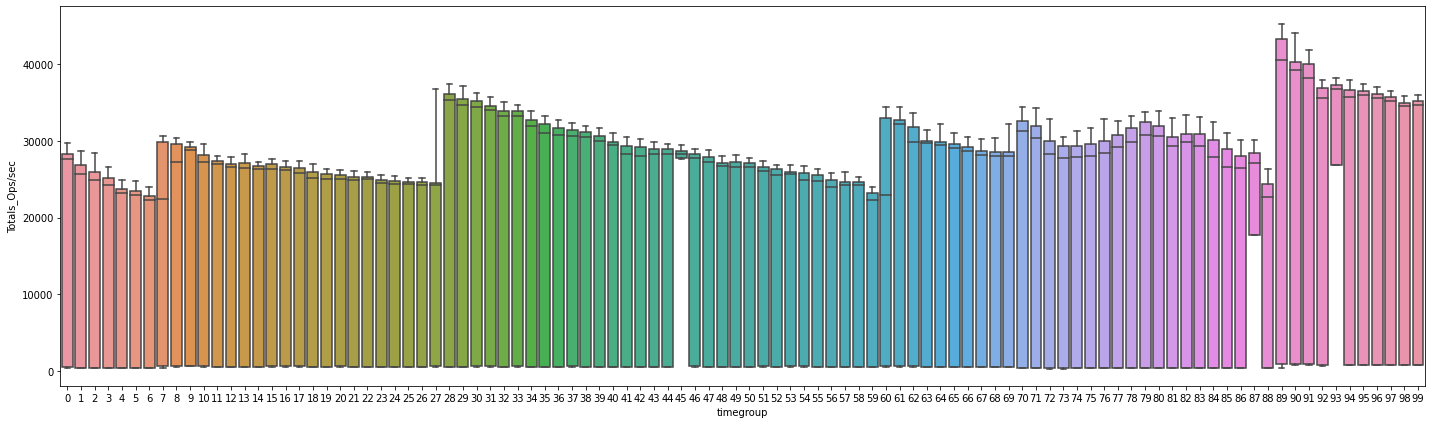

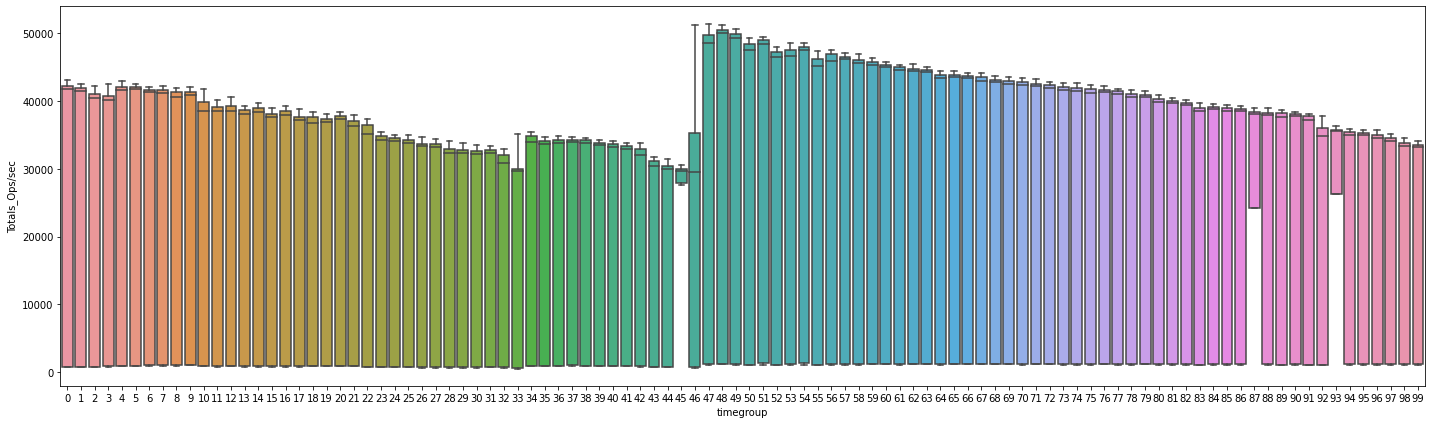

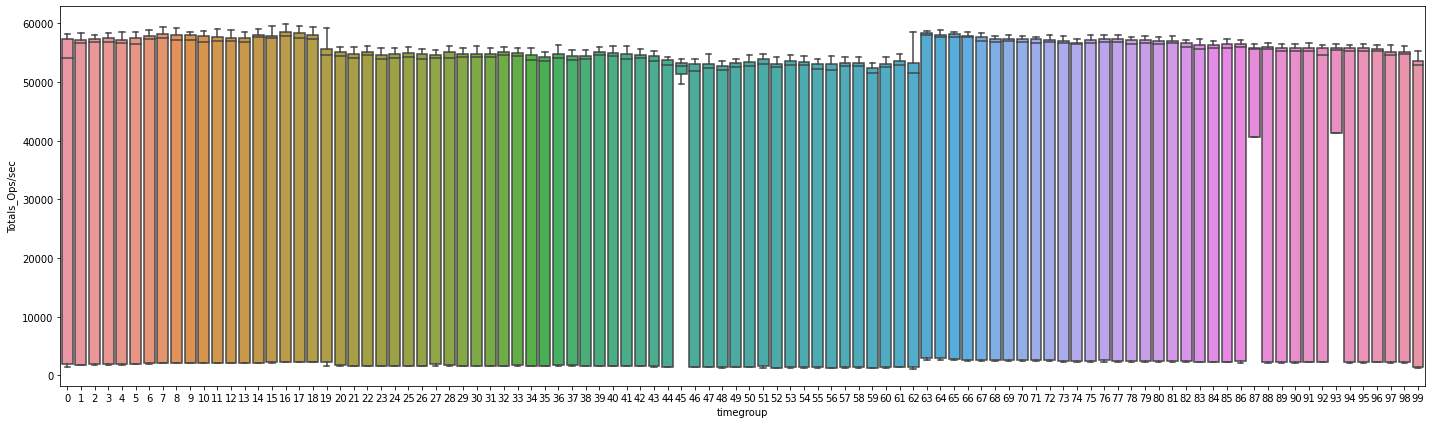

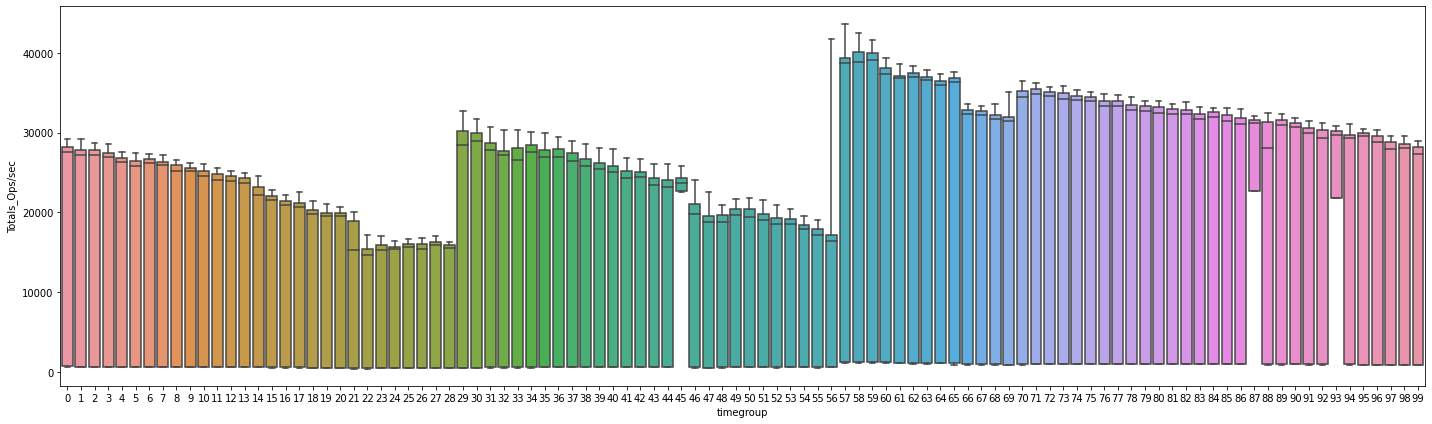

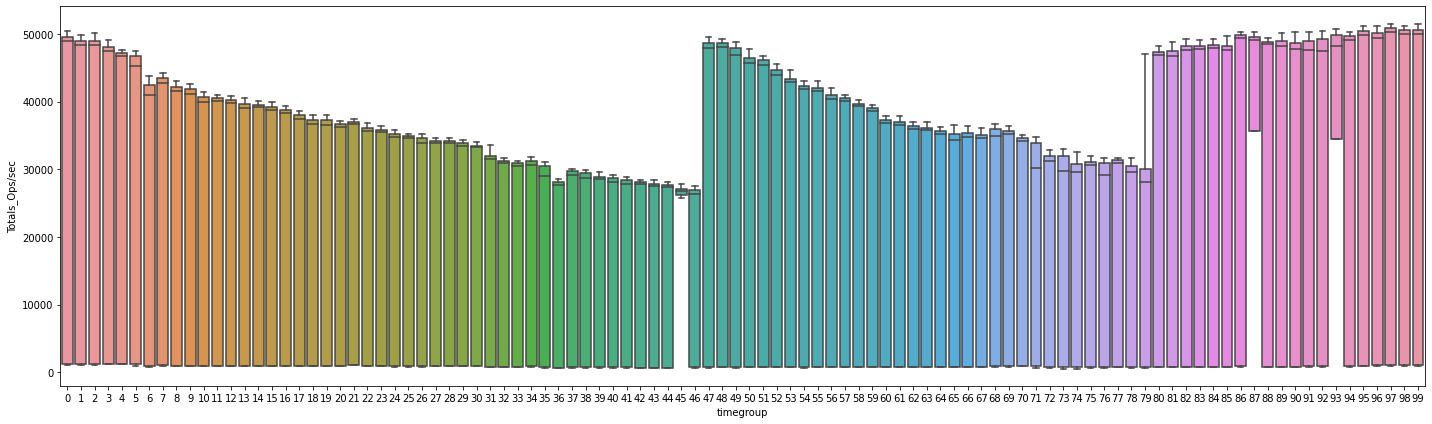

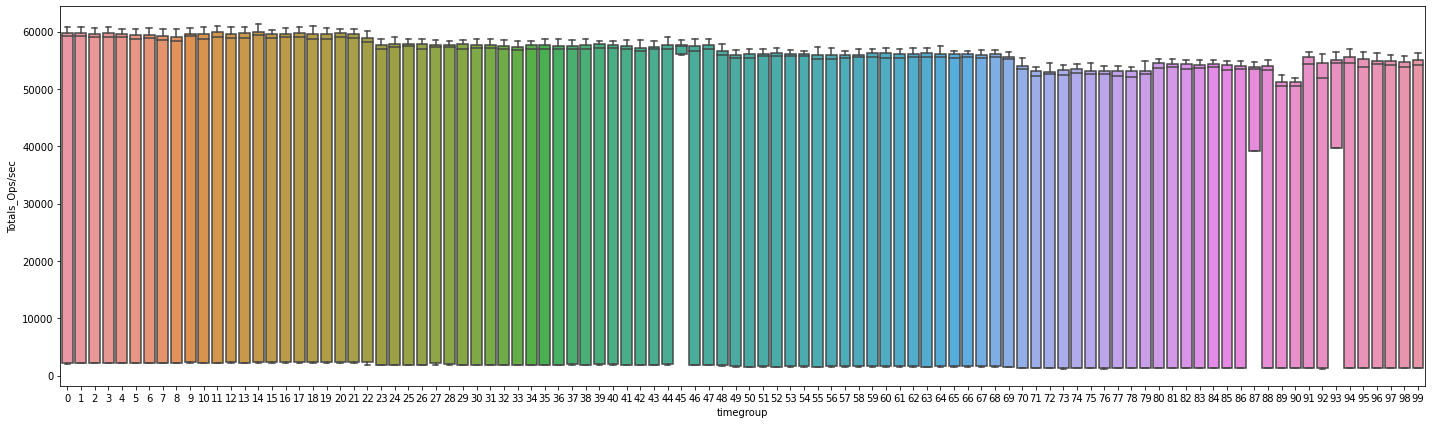

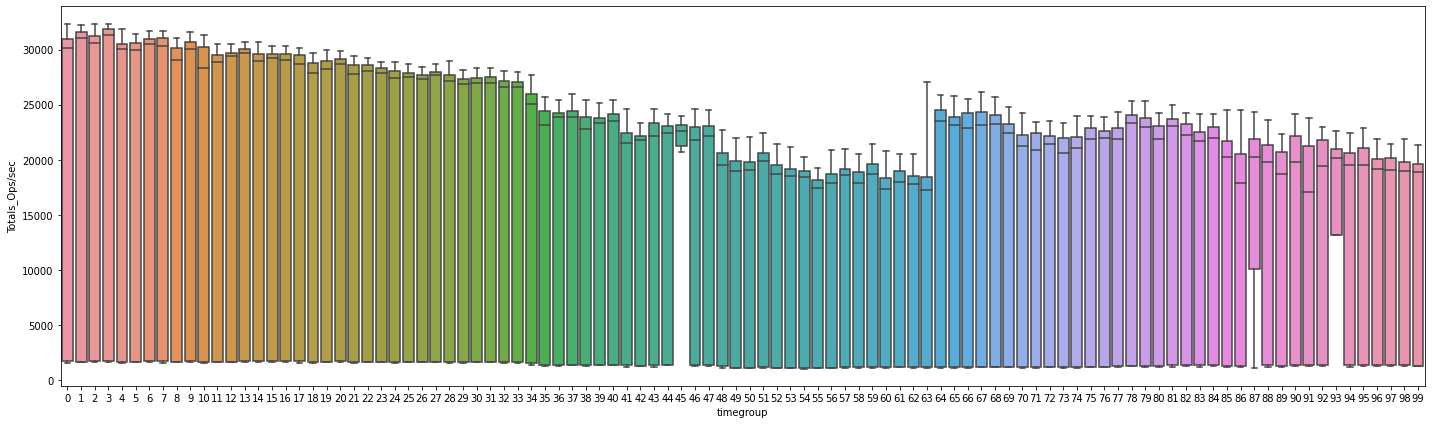

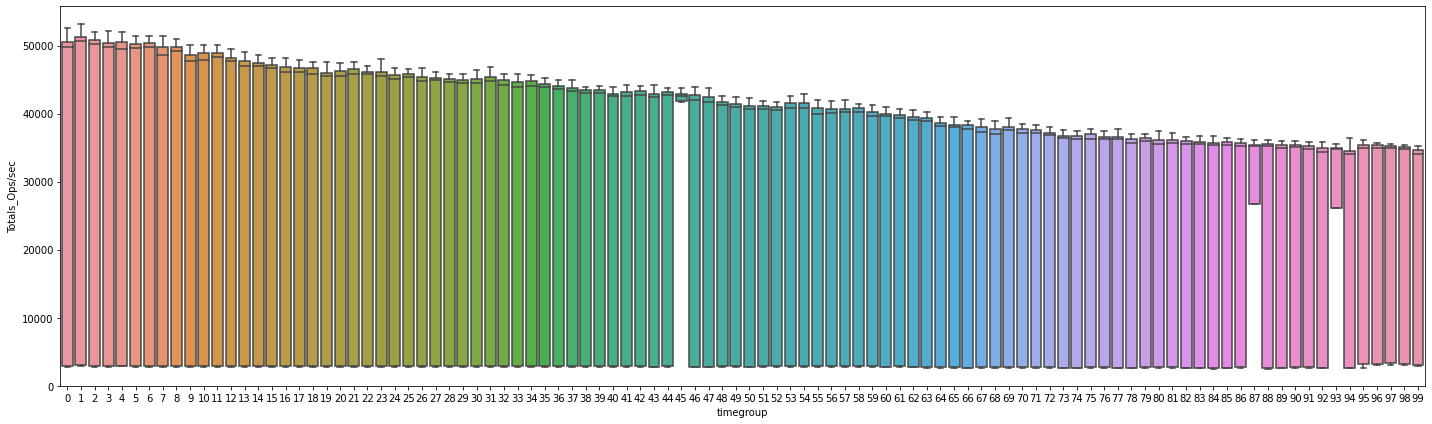

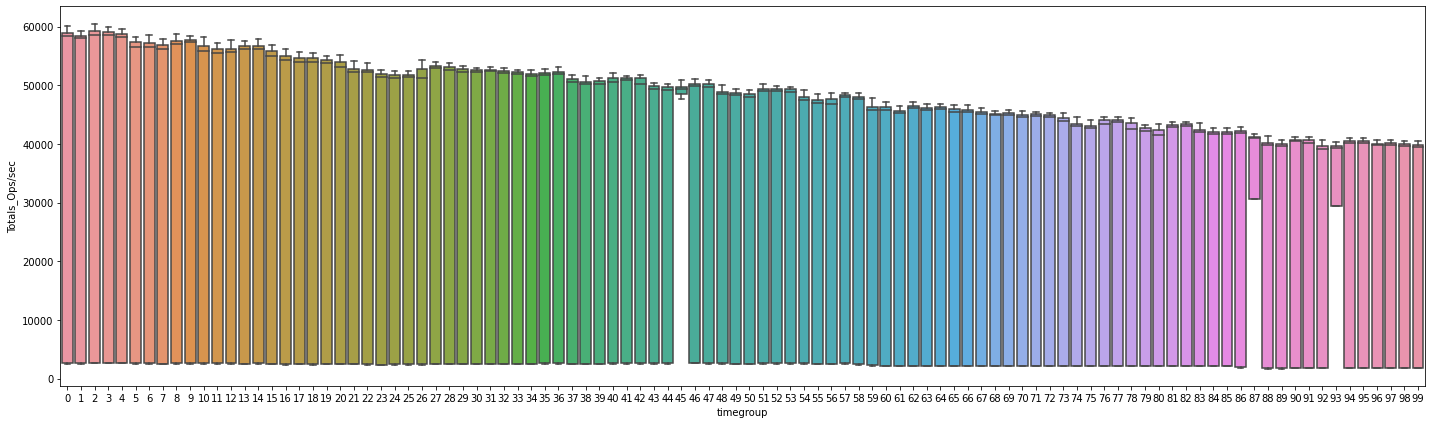

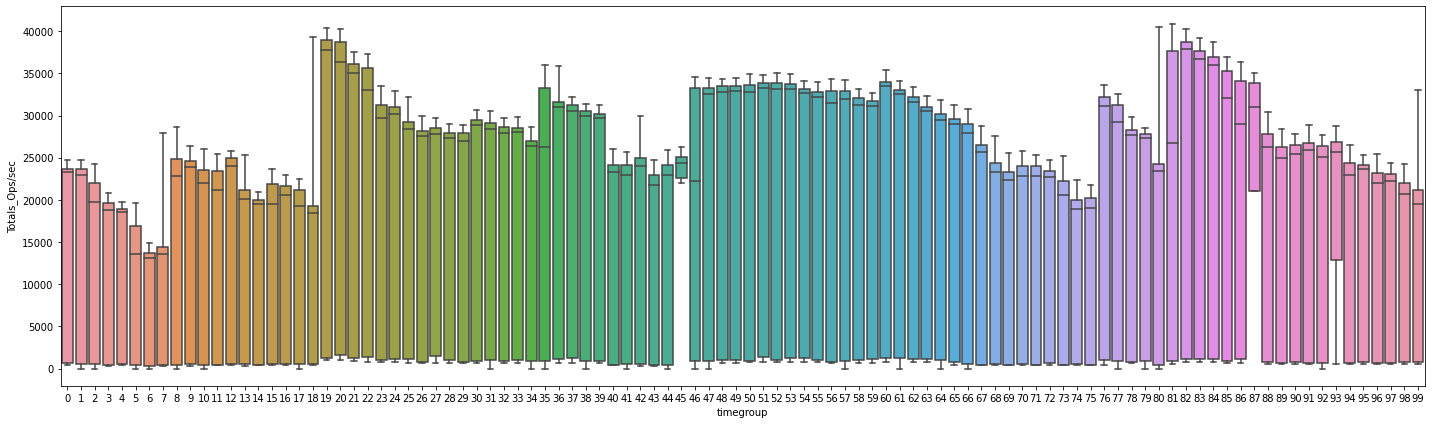

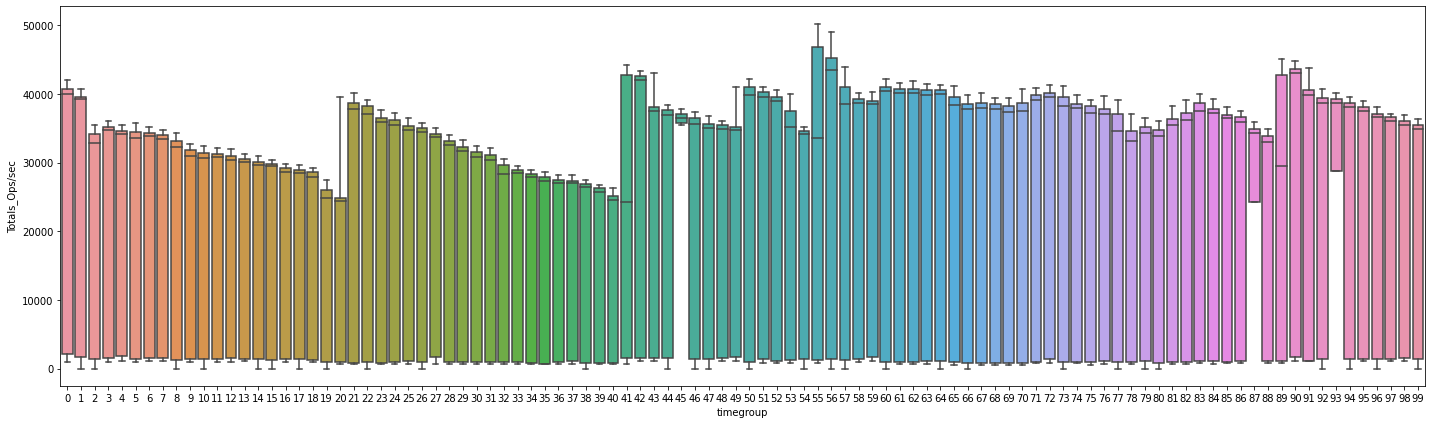

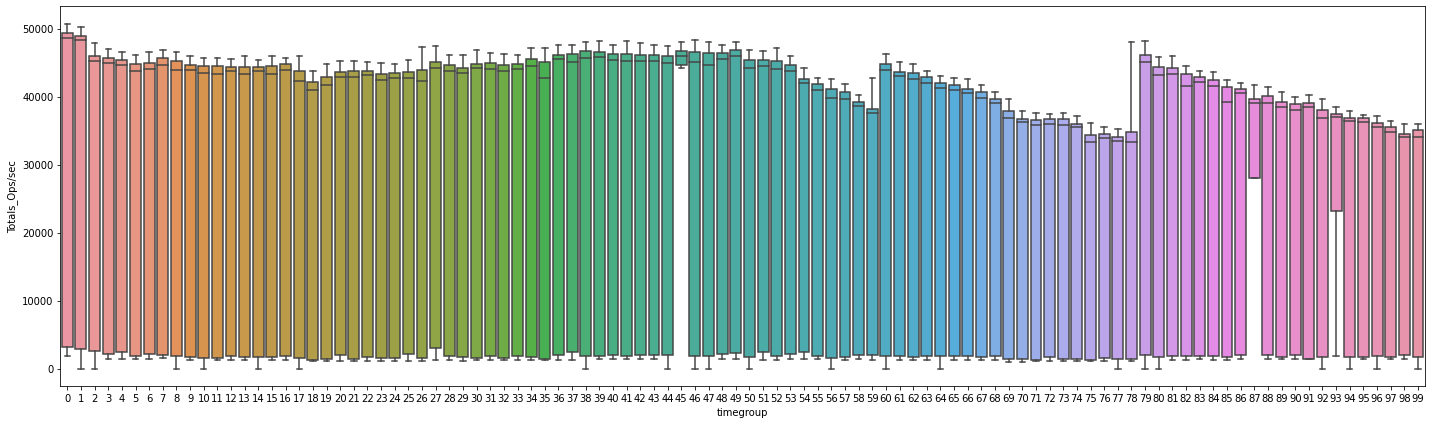

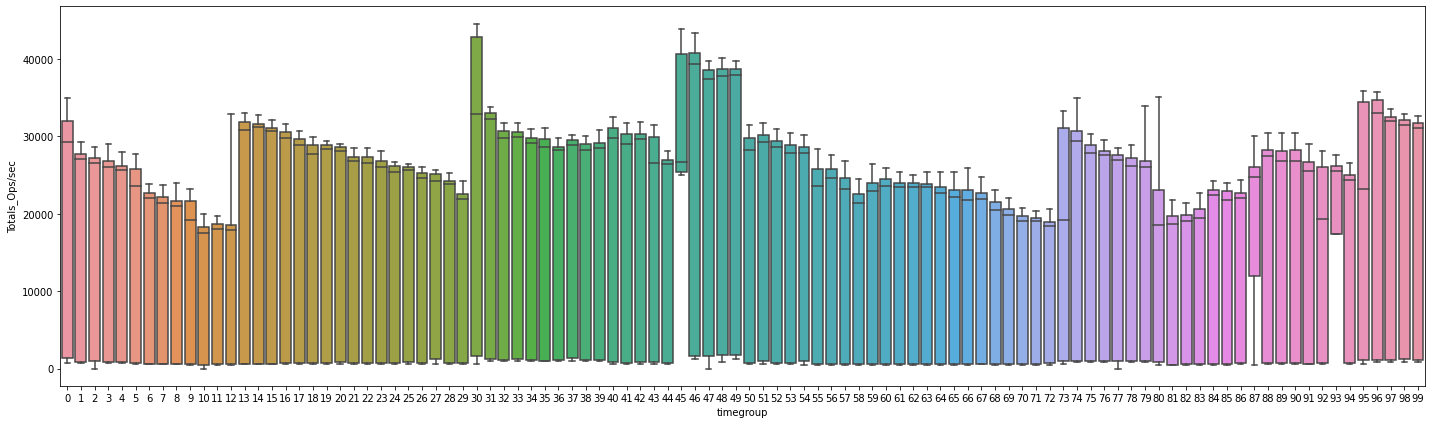

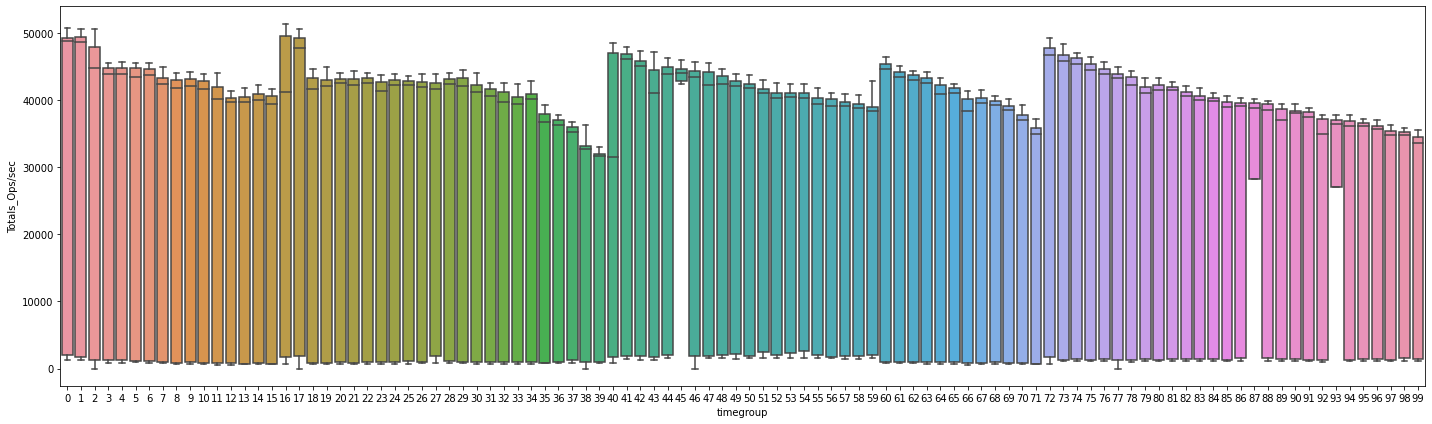

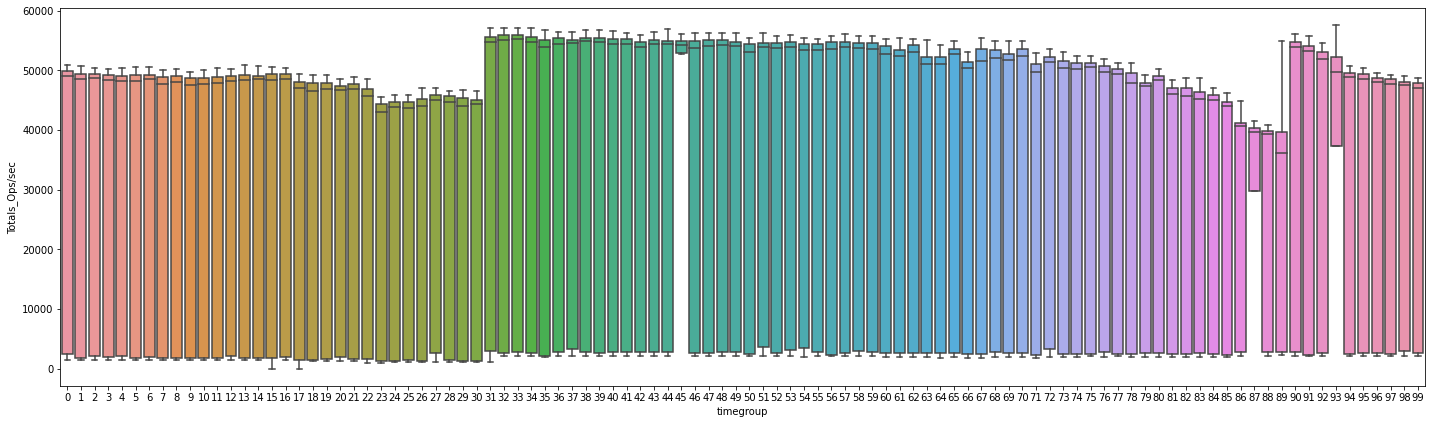

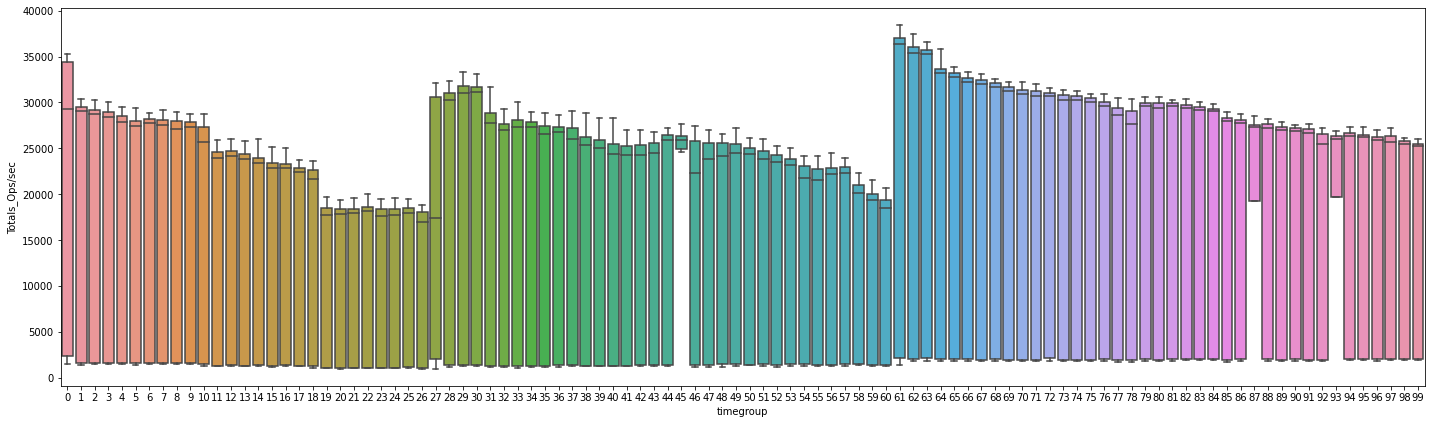

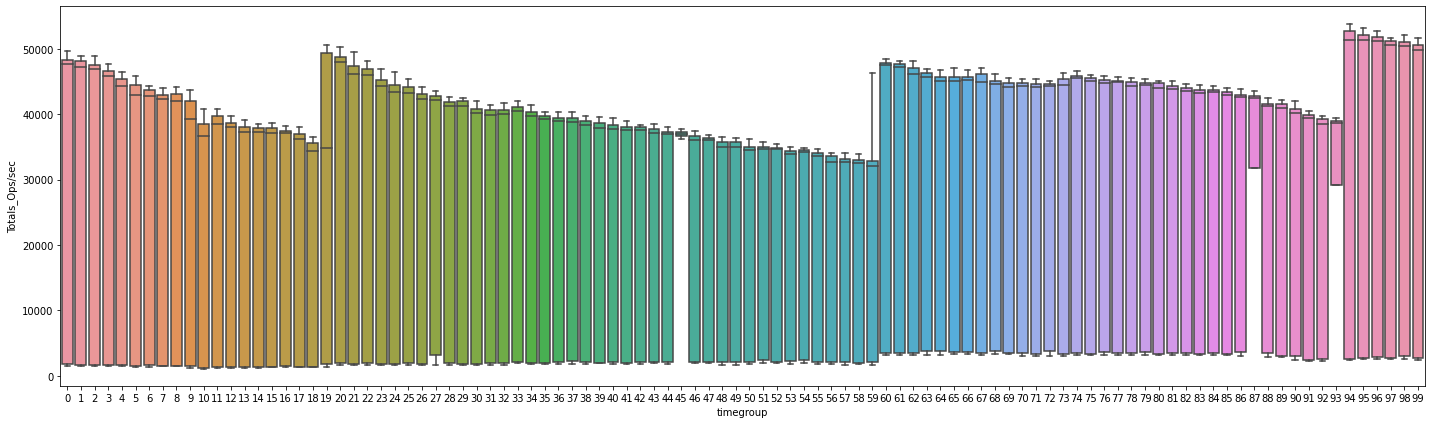

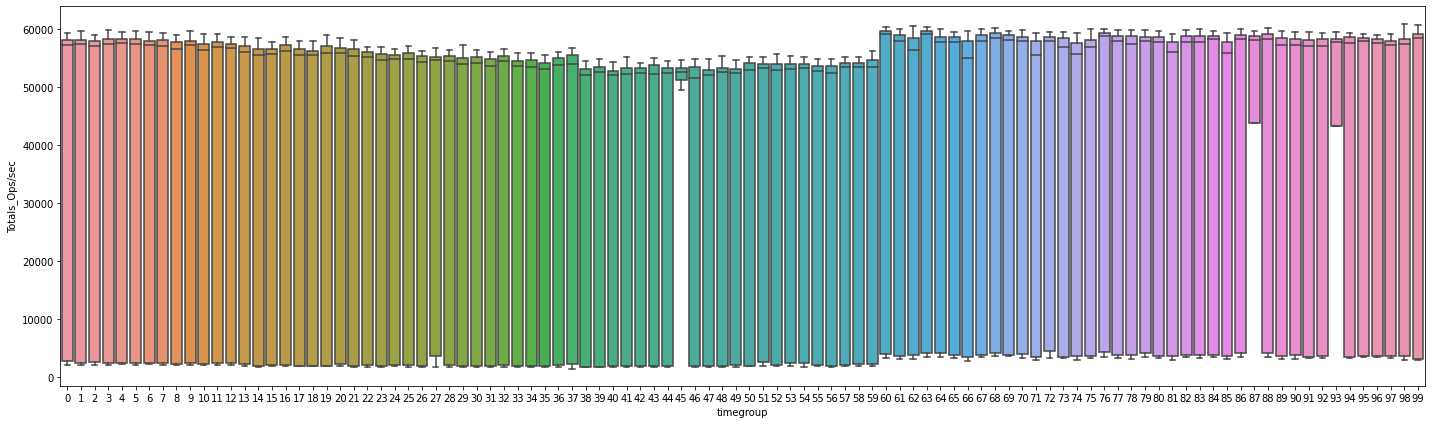

In [91]:
for i in range(1,19):
    wk = pd.read_csv(os.path.join(data_path,f'workload{i}',f'result_aof_external_{i}.csv'))
    wk_ = wk.copy()
    wk_["timegroup"] = wk.index // 100
    wk_.head()

    fig, ax = plt.subplots(1,1,figsize=(20,6))
    print(i)
    sns.boxplot(data=wk_, y=y_redis, x="timegroup", showfliers=False, ax=ax)

    #ax.axvline(x=70, c='r', linestyle='--')


    plt.tight_layout()
    plt.savefig(f'workload{i}.png')